In [1]:
import librosa
import librosa.display
import IPython
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FILENAME = '/Users/b0209153/Documents/asr-talk/time.wav'

In [3]:
IPython.display.Audio(FILENAME)

In [4]:
#!cat /Users/b0209153/Documents/asr-talk/time.wav

In [5]:
# !xxd -b /Users/b0209153/Documents/asr-talk/time.wav

In [6]:
y, sr = librosa.load(FILENAME)

print(sr)

22050


In [7]:
y.shape

(44649,)

In [8]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [9]:
y[-10:]

array([0.00039673, 0.00039673, 0.00042725, 0.00042725, 0.00045776,
       0.00045776, 0.00039673, 0.00045776, 0.00042725, 0.00039673],
      dtype=float32)

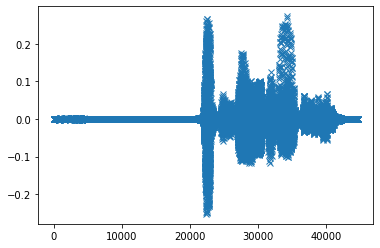

In [10]:
plt.plot(range(len(y)),y,'x')

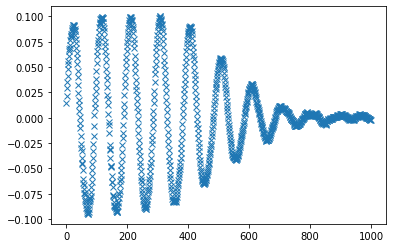

In [11]:
y_trimmed = y[30000:31000]
plt.plot(range(len(y_trimmed)),y_trimmed,'x')

In [12]:
"""

[sequence of 44649 float values]  -> "the time traveller"
// really long input sequence

---

compare with translation

"my dear countrymen" -> "मेरे प्यारे देशवासिओं"
less than 10 tokens -> less than 10 tokens 
""";

In [13]:
"""
Fourier transform
""";

<!-- #<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_(small).gif" width="750" align="center"> -->
![ChessUrl](fft.png)


/Users/b0209153/Documents/envs/p3.8v1/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


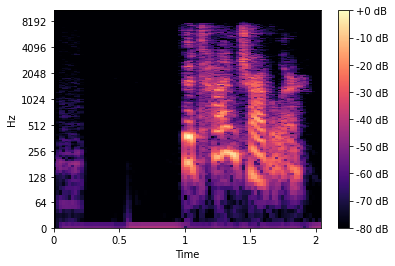

In [30]:
N_FFT = 2048
HOP_LENGTH = 512
D = np.abs(librosa.stft(y, n_fft=N_FFT,  hop_length=HOP_LENGTH))
# librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
# plt.colorbar();
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [27]:
DB.T.shape

(88, 1025)

/Users/b0209153/Documents/envs/p3.8v1/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/b0209153/Documents/envs/p3.8v1/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


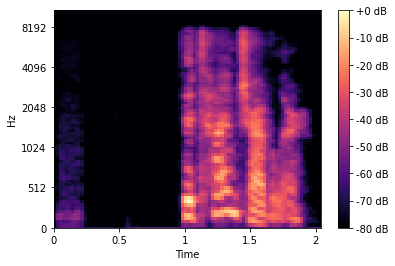

In [28]:
N_MELS = 80


S = librosa.feature.melspectrogram(y, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [29]:
S_DB.T.shape

(88, 80)

In [19]:
S_DB.shape[0] * S_DB.shape[1]

7040

In [20]:
"""
Back to slides
""";